In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [36]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [38]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [40]:
print(df.isnull().sum())

df = df.dropna()

df = pd.get_dummies(df, drop_first=True)
df.head()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


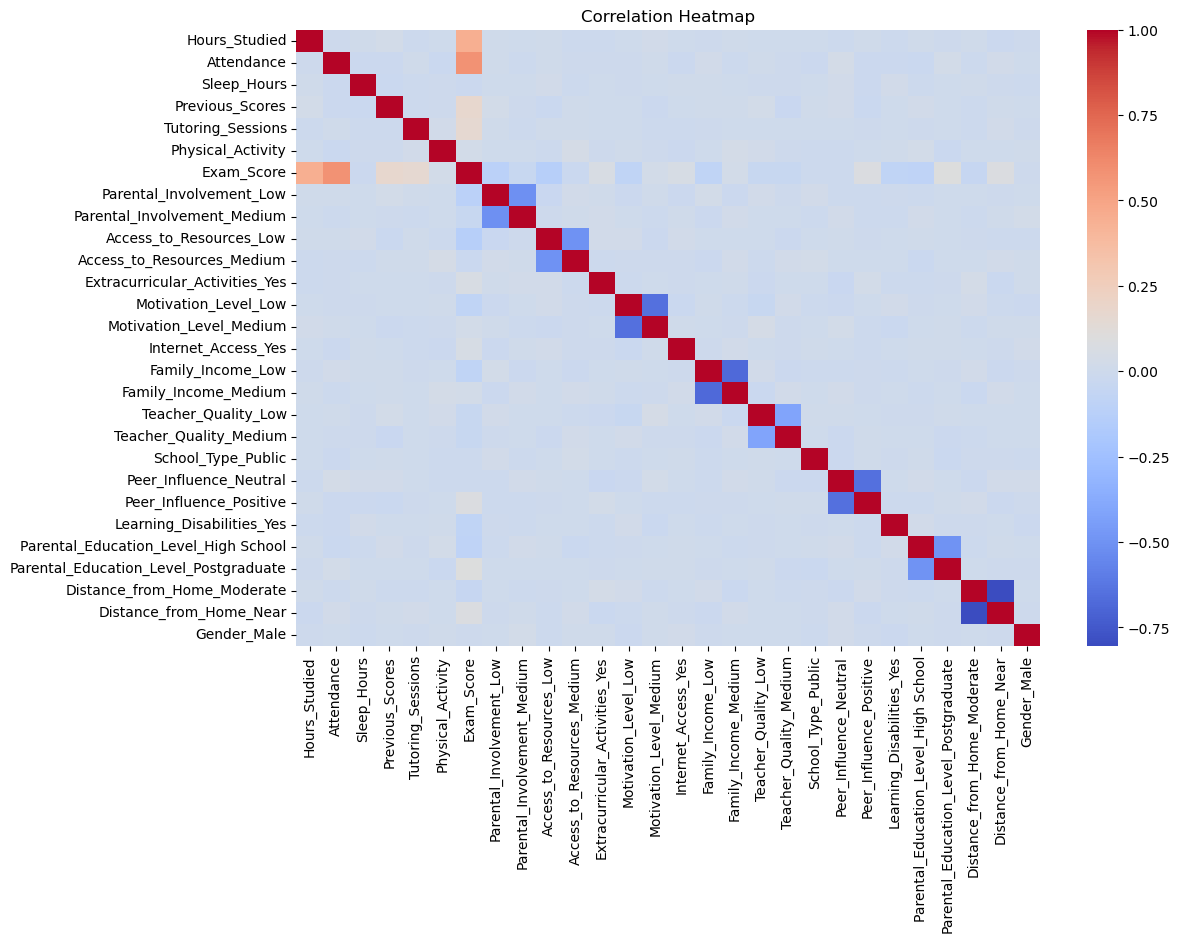

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [42]:
X = df[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

r2_1 = r2_score(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)

print("Experiment 1 — Hours, Sleep, Previous Scores")
print("R²:", r2_1)
print("MAE:", mae_1)

Experiment 1 — Hours, Sleep, Previous Scores
R²: 0.2396524144058776
MAE: 2.460410534131126


In [43]:
# Experiment 2 — All Features
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)

print("Experiment 2 — All Features")
print("R²:", r2_2)
print("MAE:", mae_2)


Experiment 2 — All Features
R²: 0.7314386522127074
MAE: 0.48728723427430787


In [44]:
# To Store results in a DataFrame
results = {
    "Experiment": [
        "Hours+Sleep+PrevScores", 
        "All Features", 
    ],
    "R² Score": [r2_1, r2_2],
    "MAE": [mae_1,mae_2]
}

results_df = pd.DataFrame(results)
print("\nComparison of Experiments:")
print(results_df)


Comparison of Experiments:
               Experiment  R² Score       MAE
0  Hours+Sleep+PrevScores  0.239652  2.460411
1            All Features  0.731439  0.487287


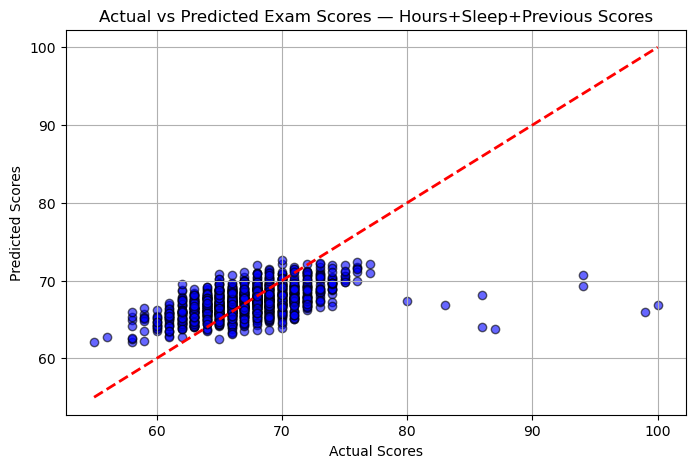

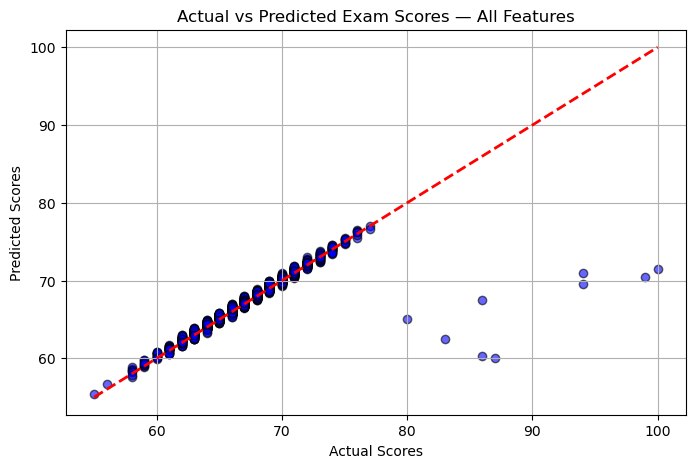

In [45]:
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(8,5))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Scores")
    plt.ylabel("Predicted Scores")
    plt.title(f"Actual vs Predicted Exam Scores — {title}")
    plt.grid(True)
    plt.show()

# Example for Experiment 1
plot_actual_vs_predicted(y_test, y_pred1, "Hours+Sleep+Previous Scores")

# Example for Experiment 2
plot_actual_vs_predicted(y_test, y_pred2, "All Features")


In [47]:
test_values = [[6, 7, 75]]  # Hours_Studied, Sleep_Hours, Previous_Scores
predicted_score = model1.predict(test_values)
print(f"Score:{predicted_score[0]}")

Score:63.247308048606904


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
# Example for model1 with multiple rows
multi_students = [
    [6, 7, 75],  # Student 1
    [3, 6, 60],  # Student 2
    [8, 8, 90]   # Student 3
]
predicted_scores = model1.predict(multi_students)
print("Predicted Scores:", predicted_scores)


Predicted Scores: [63.24730805 61.81695484 64.39119948]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
template = pd.DataFrame(columns=X.columns)
template.loc[0] = 0  
template['Hours_Studied'] = 10
template['Sleep_Hours'] = 9
template['Previous_Scores'] = 80
template['Attendance'] = 95

if 'Gender_Male' in template.columns:
    template['Gender_Male'] = 1
if 'School_Type_Private' in template.columns:
    template['School_Type_Private'] = 1

predicted_score = model2.predict(template)
print("Predicted Exam Score:", predicted_score[0])


Predicted Exam Score: 67.63750142525852


In [58]:

# Create a pipeline for Polynomial Regression (degree 2)
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Train Polynomial Regression
poly_model.fit(X_train, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test)

# Evaluate
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

# Compare with Linear Regression (model2)
y_pred_lin = model2.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

# Show results in table
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression (Degree 2)"],
    "R² Score": [r2_lin, r2_poly],
    "MAE": [mae_lin, mae_poly]
})

print(results_df)


                              Model  R² Score       MAE
0                 Linear Regression  0.731439  0.487287
1  Polynomial Regression (Degree 2)  0.702726  0.730772
